In [2]:
import scipy
from scipy import stats
from scipy import special
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn import linear_model
from sklearn.decomposition import TruncatedSVD
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop, SGD
from keras import backend as K

import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.preprocessing import Imputer

import seaborn as sns

%matplotlib inline

Using Theano backend.


In [11]:

#ae_raw = pd.DataFrame.from_csv('../pseudomonas/ae_codes.csv', sep=',')
#x_ae_codes = np.array(ae_raw)

#sample_labels = pd.read_csv('../data/pseudo_sample_names.csv', sep = ',', header = None)
#np_labels = np.array(sample_labels)

#sample_colors = cm.rainbow(np.linspace(0, 1, 950))

mm_raw = pd.DataFrame.from_csv('mmet_53species_81kcols.csv', sep = ',')
mm_np = np.array(mm_raw)

sample_colors = cm.rainbow(np.linspace(0, 1, 53))

sample_labels = pd.read_csv('mm_53labels.csv', sep = ',', header = None)
np_labels = np.array(sample_labels)


#tsne_ae_species = TSNE(n_components = 2).fit_transform(x_ae_codes)
#tsne_mm_species = TSNE(n_components = 2).fit_transform(mm_np)

In [47]:
S=pd.read_csv('../../MMETSP/SraRunInfo.csv', index_col='Run')
S2=pd.read_table('../../MMETSP/MMETSP_list',index_col='MMETSP ID')


In [51]:
d={}
d2={}

for i in S.index:
    d[i]=S.loc[i,'MMETSP ID']
colors=[]
for l in range(len(np_labels) - 1):
    e=d[np_labels[l][0]]
    if e in S2.index:
        colors+=[S2.loc[e,'Phylum']]

In [52]:
colors

['Haptophyta',
 'Cercozoa',
 'Ochrophyta',
 'Haptophyta',
 'Ochrophyta',
 'Chlorophyta',
 'Haptophyta',
 'Ochrophyta',
 'Bacillariophyta',
 'Haptophyta',
 'Chlorophyta',
 'Haptophyta',
 'Bacillariophyta',
 'Dinophyta',
 'Haptophyta',
 'Dinophyta',
 'Chlorophyta',
 'Bacillariophyta',
 'Dinophyta',
 'Haptophyta',
 'Haptophyta',
 'Rhodophyta',
 'Unknown',
 'Unknown',
 'Haptophyta',
 'Haptophyta',
 'Chlorophyta',
 'Chlorophyta',
 'Chlorophyta',
 'Ochrophyta',
 'Ochrophyta',
 'Chlorophyta',
 'Haptophyta',
 'Unknown',
 'Ochrophyta',
 'Unknown',
 'Ochrophyta',
 'Bacillariophyta',
 'Ochrophyta',
 'Bacillariophyta',
 'Bacillariophyta',
 'Bacillariophyta',
 'Dinophyta']

In [64]:
#tsne_ae_species = TSNE(n_components = 2).fit_transform(x_ae_codes)
#tsne_mm_species = TSNE(n_components = 2).fit_transform(mm_np)

def scatter(x, colors, labels, noise = False, show_non_label = False):
    
    if noise: 
        if_noise = 50
    else:
        if_noise = 0 
    
    # Seaborn color palette 
    palette = np.array(sns.color_palette("hls", 10))
    f = plt.figure(figsize = (30, 30))
    ax = plt.subplot(aspect = 'equal')
    #sc = ax.scatter(x[:, 0], x[:, 1], lw = 0, s = 40,
                #    c = palette[colors.astype(np.int)])
    sc = ax.scatter(x[:, 0], x[:, 1], lw = 0, s = 200,
                    c = colors)

    # Add labels 
    for i in range(53):
        #if ((labels[i] == 'PAO1') or (labels[i] == 'PAHM4') or (labels[i] == '8408') or (labels[i] == '8083')):
        #    if (i % 3 == 0):
        ax.annotate(labels[i], xy = (x[i, 0], x[i, 1]), size = 15, 
                            xytext = (-if_noise * random.random(), if_noise * random.random()),
                            textcoords = 'offset points')

        #elif show_non_label: 
        #    if (i % 21 == 0):
        #        ax.annotate(np_labels[i], xy = (x[i, 0], x[i, 1]), size = 20, 
        #                    xytext = (-if_noise * random.random(), if_noise * random.random()), 
        #                    textcoords = 'offset points')


    return f, ax, sc


In [70]:
ij=len(set(colors))
cmm=pal.colorbrewer.qualitative.Accent_8.hex_colors

In [83]:
dd={}
for i,j in enumerate(set(colors)):
    dd[j]=i
lcol=[]
for i,j in enumerate(colors):
    lcol+=[cmm[dd[j]]]
print colors
print lcol

['Haptophyta', 'Cercozoa', 'Ochrophyta', 'Haptophyta', 'Ochrophyta', 'Chlorophyta', 'Haptophyta', 'Ochrophyta', 'Bacillariophyta', 'Haptophyta', 'Chlorophyta', 'Haptophyta', 'Bacillariophyta', 'Dinophyta', 'Haptophyta', 'Dinophyta', 'Chlorophyta', 'Bacillariophyta', 'Dinophyta', 'Haptophyta', 'Haptophyta', 'Rhodophyta', 'Unknown', 'Unknown', 'Haptophyta', 'Haptophyta', 'Chlorophyta', 'Chlorophyta', 'Chlorophyta', 'Ochrophyta', 'Ochrophyta', 'Chlorophyta', 'Haptophyta', 'Unknown', 'Ochrophyta', 'Unknown', 'Ochrophyta', 'Bacillariophyta', 'Ochrophyta', 'Bacillariophyta', 'Bacillariophyta', 'Bacillariophyta', 'Dinophyta']
['#666666', '#BEAED4', '#386CB0', '#666666', '#386CB0', '#FFFF99', '#666666', '#386CB0', '#BF5B17', '#666666', '#FFFF99', '#666666', '#BF5B17', '#F0027F', '#666666', '#F0027F', '#FFFF99', '#BF5B17', '#F0027F', '#666666', '#666666', '#7FC97F', '#FDC086', '#FDC086', '#666666', '#666666', '#FFFF99', '#FFFF99', '#FFFF99', '#386CB0', '#386CB0', '#FFFF99', '#666666', '#FDC086'

IndexError: list index out of range

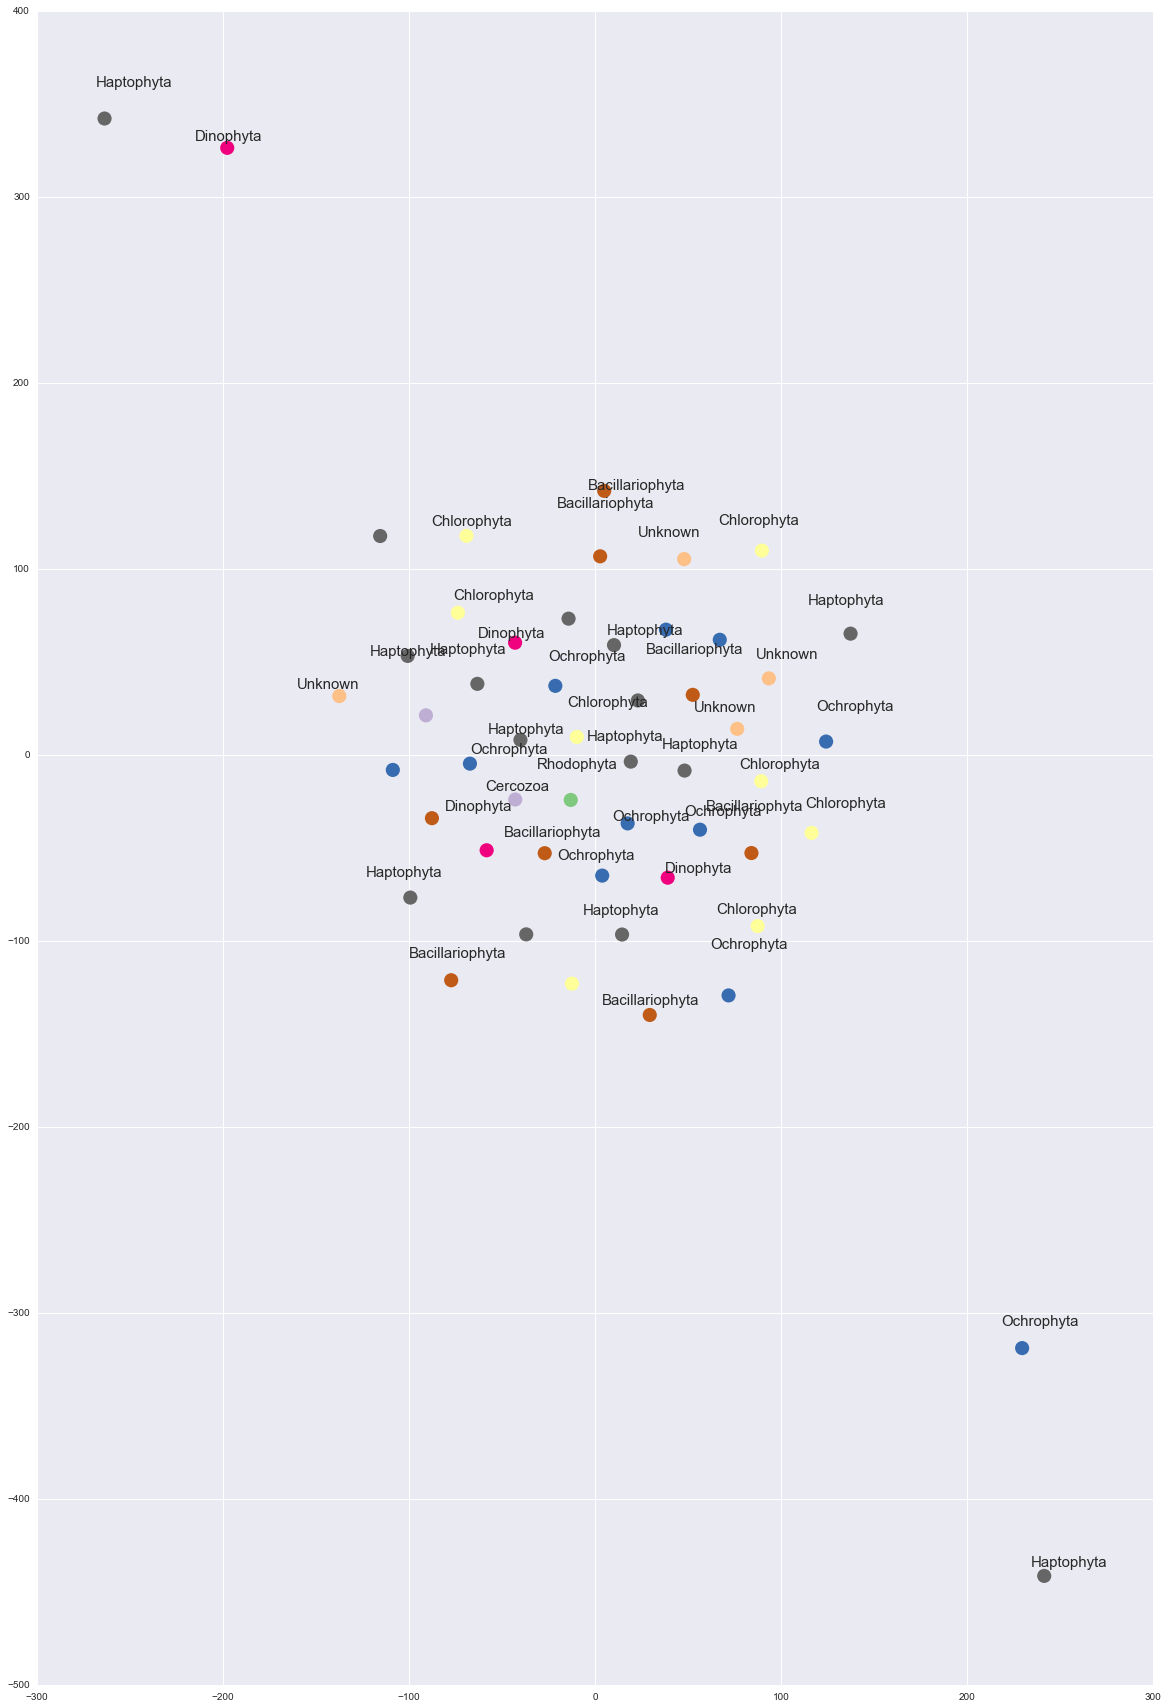

In [84]:
scatter(tsne_mm_species, lcol, colors, True, True)

In [85]:
plt.savefig("may5_tsne_mm_REAL_53species.png")
p 

In [ ]:
#scatter(tsne_ae_species, sample_colors, np_labels)

In [117]:
#palette = np.array(sns.color_palette("hls", 10))
#plt.figure(figsize = (30, 30))
#ax = plt.subplot(aspect = 'equal')
#ax.scatter(tsne_ae_species[:, 0], tsne_ae_species[:, 1], lw = 0, s = 300,
#                    c = sample_colors)

#for i in range(950):
#    # print every 12 
#    #if (i % 12 == 0):
#    if ((np_labels[i] == 'PAO1') or (np_labels[i] == 'PAHM4') or (np_labels[i] == '8408') or (np_labels[i] == '8083')):
#        #if (i % 3 == 0):
#        ax.annotate(np_labels[i], xy = (tsne_ae_species[i, 0], tsne_ae_species[i, 1]), size = 25, 
#                        xytext = (0 * random.random(), 0 * random.random()), textcoords = 'offset points')
#        
#plt.savefig("may5_tsne_samples_seePseudoImportance.png")
#plt.show()


In [116]:
#plt.clf() 

#plt.figure(figsize = (30, 30))
#ax = plt.subplot(aspect = 'equal')
#ax.scatter(tsne_ae_species[:, 0], tsne_ae_species[:, 1], lw = 0, s = 300,
 #                   c = sample_colors)

#for i in range(950):
    # print every 12 
    #if (i % 12 == 0):
#    if ((np_labels[i] == 'PAO1') or (np_labels[i] == 'PAHM4') or (np_labels[i] == '8408') or (np_labels[i] == '8083')):
#        if (i % 3 == 0):
#            ax.annotate(np_labels[i], xy = (tsne_ae_species[i, 0], tsne_ae_species[i, 1]), size = 25, 
#                        xytext = (-50 * random.random(), 50 * random.random()), textcoords = 'offset points')
        
#plt.savefig("may5_tsne_samples_seePseudoImportance_add_label_noise.png")

In [110]:
#plt.clf()

In [115]:
#
#plt.clf()
#
#plt.figure(figsize = (30, 30))
#ax = plt.subplot(aspect = 'equal')
#ax.scatter(tsne_ae_species[:, 0], tsne_ae_species[:, 1], lw = 0, s = 300,
#                    c = sample_colors)
#
#for i in range(950):
    # print every 12 
    #if (i % 12 == 0):
#    if ((np_labels[i] == 'PAO1') or (np_labels[i] == 'PAHM4') or (np_labels[i] == '8408') or (np_labels[i] == '8083')):
#        if (i % 3 == 0):
#            ax.annotate(np_labels[i], xy = (tsne_ae_species[i, 0], tsne_ae_species[i, 1]), size = 35, 
#                        xytext = (-50 * random.random(), 50 * random.random()), textcoords = 'offset points')
#        
#    else: 
#        if (i % 21 == 0):
#            ax.annotate(np_labels[i], xy = (tsne_ae_species[i, 0], tsne_ae_species[i, 1]), size = 20, 
#                        xytext = (-50 * random.random(), 50 * random.random()), textcoords = 'offset points')
#        
#        
#plt.savefig("may5_tsne_samples_see_all_labels.png")
